# Andrew Ng Coursera Machine Learning Course - Ex 2
**Dean's Reimplementation Attempt**

*8/19/2017*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Logistic Regression
**Note:** This is a classification algorithm, despite the term "regression" in the name.  Classification means outputs $y$ take on discrete values, for example $y \in \{0,1\}$.  The output is  also known as a *label*.

*Sigmoid function*, aka *logistic function*

$$ g(z) = \frac{1}{1 + e^{-z}}$$

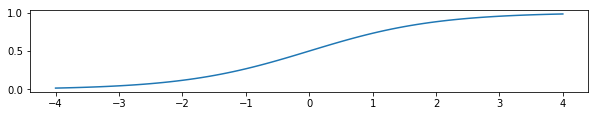

In [2]:
z = np.arange(-4, 4.01, .1)
g = 1 / (1 + np.exp(-z))
plt.figure(figsize=(10, 1.5))
plt.plot(z, g)

For the hypothesis, use:

$$z = \theta^Tx$$

$$h_\theta(x) = g(z) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}} $$

... making $h_\theta(x)$ the probability that the output is 1, not 0.

$$h_\theta(x) = P(y=1 \: | \: x;\theta) $$

For the decision boundary, if $h_\theta(x) \ge 0.5$, predict $y = 1$.  This happens when $z \ge 0$.

For the cost function, use:

$$\text{Cost}(h_\theta(x), y) = - \log_e(h_\theta(x)) \qquad\qquad \text{if} \, y=1 $$
$$\text{Cost}(h_\theta(x), y) = - \log_e(1 - h_\theta(x)) \qquad \text{if} \, y=0 $$
$$J(\theta) = \frac{1}{m} \sum_{i=1}^m \text{Cost}\left(h_\theta(x^{(i)}, y^{(i)}\right) $$

...so...

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ 
y^{(i)} \log(h_\theta(x^{(i)}))
+ (1-y^{(i)}) \log(1 - h_\theta(x^{(i)}))
\right] $$

Vectorized, this is:
$$J(\theta) = \frac{1}{m} \left( -y^T\log(h) - (1-y)^T\log(1-h) \right) $$

The gradient is:
$$\frac{\partial}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^m
  \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$

So the gradient descent rule is:

$$\theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m
  \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$
...which *looks* the same as for linear regression, but remember that $h_\theta(x^{(i)})$ is the sigmoid function this time.

## 1.1 Visualizing the data

In [78]:
data = np.loadtxt('ex2/ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:3]
print(data.shape)
print(X.shape)
print(y.shape)
print(data[:5])
print(X[:5])
print(y[:5])

(100, 3)
(100, 2)
(100, 1)
[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]]
[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]


In [79]:
pos = np.where(y == 1)
neg = np.where(y == 0)

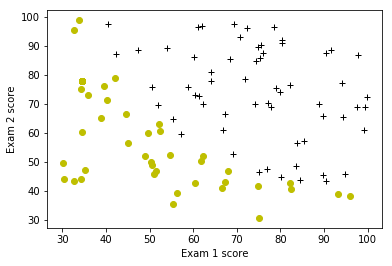

In [80]:
plt.plot(X[pos, 0], X[pos, 1], 'k+', label='Admitted')
plt.plot(X[neg, 0], X[neg, 1], 'yo', label='Not admitted')
#plt.legend() # This was putting one legend entry for each point.
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# 1.2. Implementation

In [81]:
# Add the intercept/bias term of all 1's to X.
m = X.shape[0]
ones = np.ones((m, 1))
X = np.hstack((ones, X))
print(X[:5])

[[  1.          34.62365962  78.02469282]
 [  1.          30.28671077  43.89499752]
 [  1.          35.84740877  72.90219803]
 [  1.          60.18259939  86.3085521 ]
 [  1.          79.03273605  75.34437644]]


## 1.2.1. Warmup exercise: sigmoid function
*Sigmoid function*, aka *logistic function*

$$ g(z) = \frac{1}{1 + e^{-z}}$$

In [83]:
# Student implements...
def sigmoid(X):
    g = 1 / (1 + np.exp(-X))
    return g

## 1.2.2. Cost function and gradient

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ 
y^{(i)} \log(h_\theta(x^{(i)}))
+ (1-y^{(i)}) \log(1 - h_\theta(x^{(i)}))
\right] $$

$$\frac{\partial}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^m
  \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$

In [86]:
initial_theta = np.zeros((X.shape[1], 1))

In [88]:
# Student implements...
def costFunction(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X @ theta) # Not theta.T @ X because I wanted samples in rows?

    Jsumofones = y.T @ np.log(h) 
    Jsumofzeros = (1-y).T @ np.log(1-h)
    J = (-1/m) * (Jsumofones + Jsumofzeros)
    
    grad = (1/m) * X.T @ (h - y)

    return J, grad

In [89]:
cost, grad = costFunction(initial_theta, X, y)

In [96]:
# Expected 0.693, and [-0.1, -12.0092, -11.2628]
print(cost) # Should this be coming out as a scalar, not a 2-d array?
print(grad) # Should this be coming out as a 1-d array, not a 2-d array?

[[ 0.69314718]]
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [105]:
# Extra parentheses and commas make the following a column vector.
test_theta = np.array(((-24,), (0.2,), (0.2,)))
print(test_theta.shape)
cost, grad = costFunction(test_theta, X, y)

(3, 1)


In [106]:
# Expected cost (approx): 0.218
# Expected gradients (approx):  0.043, 2.566, 2.647');
print(cost) # Should this be coming out as a scalar, not a 2-d array?
print(grad) # Should this be coming out as a 1-d array, not a 2-d array?

[[ 0.21833019]]
[[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]
